In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("DATASET/training_set_features.csv")

In [3]:
data_train.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

<h1> Preprocessing and Cleaning Data </h1>

In [5]:
data_train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
data_train['h1n1_concern'].unique()  # how concerned the person is.

array([ 1.,  3.,  2.,  0., nan])

In [7]:
data_train['h1n1_concern'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26707 entries, 0 to 26706
Series name: h1n1_concern
Non-Null Count  Dtype  
--------------  -----  
26615 non-null  float64
dtypes: float64(1)
memory usage: 208.8 KB


In [8]:
data_train['h1n1_knowledge'].unique()  # how much knowledge does the person have about h1n1

array([ 0.,  2.,  1., nan])

In [9]:
data_train['h1n1_knowledge'].isna().value_counts()

False    26591
True       116
Name: h1n1_knowledge, dtype: int64

In [10]:
data_train['behavioral_antiviral_meds'].unique()  # has taken any antiviral medication 


array([ 0.,  1., nan])

In [11]:
data_train['behavioral_antiviral_meds'].isna().value_counts()  # instead of deleting the null , lets fill it up with some other value

False    26636
True        71
Name: behavioral_antiviral_meds, dtype: int64

In [12]:
data_train['behavioral_avoidance'].unique() # has avoided any close contact with affected people

array([ 0.,  1., nan])

In [13]:
data_train['behavioral_antiviral_meds'].isna().value_counts()

False    26636
True        71
Name: behavioral_antiviral_meds, dtype: int64

In [14]:
data_train['behavioral_face_mask'].isna().value_counts()  # has bought a face mask

False    26688
True        19
Name: behavioral_face_mask, dtype: int64

In [15]:
data_train['behavioral_wash_hands'].isna().value_counts()   # wash hands

False    26665
True        42
Name: behavioral_wash_hands, dtype: int64

In [16]:
data_train['behavioral_large_gatherings'].isna().value_counts()  # has reduced time in large gathering

False    26620
True        87
Name: behavioral_large_gatherings, dtype: int64

In [17]:
data_train['behavioral_outside_home'].isna().value_counts() # has reduced contact with the people outside the home

False    26625
True        82
Name: behavioral_outside_home, dtype: int64

In [18]:
data_train['behavioral_touch_face'].isna().value_counts()  # has avoided tuching mouth

False    26579
True       128
Name: behavioral_touch_face, dtype: int64

In [19]:
data_train['doctor_recc_h1n1'].isna().value_counts()  # was h1n1 vaccine reccomended by doctor
# this column can be dropped

False    24547
True      2160
Name: doctor_recc_h1n1, dtype: int64

In [20]:
data_train['doctor_recc_seasonal'].value_counts()  # was seasonal flu vaccine recommended by doctor
# can be dropped

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

In [21]:
data_train['chronic_med_condition'].unique()  # has any chronic condition?

array([ 0.,  1., nan])

In [22]:
data_train['child_under_6_months'].isna().value_counts()  # has regular contact with child under  age of 6 months

# irrelevant

False    25887
True       820
Name: child_under_6_months, dtype: int64

In [23]:
data_train['opinion_h1n1_vacc_effective'].isna().value_counts()
# irrelevant 

False    26316
True       391
Name: opinion_h1n1_vacc_effective, dtype: int64

In [24]:
data_train['opinion_h1n1_risk'].isna().value_counts()

# drop all opinion columns

False    26319
True       388
Name: opinion_h1n1_risk, dtype: int64

In [25]:
alfa_1 = dict(zip(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years','45 - 54 Years'],[0,1,2,3,4]))

In [26]:
alfa_1

{'55 - 64 Years': 0,
 '35 - 44 Years': 1,
 '18 - 34 Years': 2,
 '65+ Years': 3,
 '45 - 54 Years': 4}

In [27]:
data_train['age_group'].replace(alfa_1,inplace=True)

In [28]:
data_train['education'].isna().value_counts()

False    25300
True      1407
Name: education, dtype: int64

In [29]:
alfa = dict(zip(['White', 'Black', 'Other or Multiple', 'Hispanic'],[0,1,2,3]))
alfa

{'White': 0, 'Black': 1, 'Other or Multiple': 2, 'Hispanic': 3}

In [30]:
data_train['race'].replace(alfa, inplace = True)

In [31]:
# target data
data_2 = pd.read_csv("DATASET/training_set_labels.csv")
data_2

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [32]:
merged_frames = pd.merge(data_train, data_2,on = 'respondent_id')

In [33]:
merged_frames['health_insurance'].isna().value_counts()

False    14433
True     12274
Name: health_insurance, dtype: int64

In [34]:
alfa_3 = dict(zip(['12 Years', 'College Graduate', 'Some College', '< 12 Years'],[0,1,2,3]))

In [35]:
merged_frames['education'].replace(alfa_3, inplace = True)

In [36]:
merged_frames['sex'].replace({'Male':1, 'Female':0},inplace=True)

In [37]:
merged_frames.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [38]:
# dropping tables
merged_frames.drop(['doctor_recc_h1n1','doctor_recc_seasonal','health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','employment_status'],axis = 1, inplace=True)

In [39]:
print([i for i in range(21)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [40]:
merged_frames['employment_industry'].replace(dict(zip(['pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn', 'xicduogh',
       'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'fcxhlnwr', 'vjjrobsf',
       'arjwrbjb', 'msuufmds', 'xqicxuve', 'phxvnwax', 'dotnnunm',
       'cfqqtusy', 'mcubkhph', 'mfikgejo', 'atmlpfrs', 'haxffmxo',
       'qnlwzans'],[i for i in range(21)])), inplace = True)

In [41]:
merged_frames['employment_occupation'].replace(dict(zip(['xgwztkwe', 'xtkaffoo', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'bxpfxfdn',
       'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss', 'hfxkjkmi',
       'oijqvulv', 'rcertsgn', 'tfqavkke', 'uqqtjvyb', 'pvmttkik',
       'xzmlyyjv', 'dcjcmpih', 'hodpvpew'], [i for i in range(23)])), inplace=True)

In [42]:
merged_frames.shape

(26707, 28)

In [43]:
merged_frames.dropna(inplace=True)
merged_frames.shape

(11667, 28)

In [44]:
alfa_4 = dict(zip(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],[0,1,2]))

In [45]:
merged_frames['marital_status'].replace(dict(zip(['Not Married', 'Married'],[0,1])),inplace=True)

In [46]:
merged_frames['rent_or_own'].replace(dict(zip(['Rent', 'Own'],[0,1])),inplace = True)

In [47]:
merged_frames['hhs_geo_region'].replace(dict(zip(['bhuqouqj', 'qufhixun', 'atmpeygn', 'lzgpxyit', 'oxchjgsf',
       'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'lrircsnp', 'kbazzjca'],[0,1,2,3,4,5,6,7,8,9])), inplace = True)

In [48]:
merged_frames['census_msa'].replace(dict(zip(['MSA, Not Principle  City', 'MSA, Principle City', 'Non-MSA'],[0,1,2])),inplace = True)

In [49]:
merged_frames['income_poverty'].replace(alfa_4, inplace = True)

In [50]:
merged_frames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11667 entries, 1 to 26703
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                11667 non-null  int64  
 1   h1n1_concern                 11667 non-null  float64
 2   h1n1_knowledge               11667 non-null  float64
 3   behavioral_antiviral_meds    11667 non-null  float64
 4   behavioral_avoidance         11667 non-null  float64
 5   behavioral_face_mask         11667 non-null  float64
 6   behavioral_wash_hands        11667 non-null  float64
 7   behavioral_large_gatherings  11667 non-null  float64
 8   behavioral_outside_home      11667 non-null  float64
 9   behavioral_touch_face        11667 non-null  float64
 10  chronic_med_condition        11667 non-null  float64
 11  child_under_6_months         11667 non-null  float64
 12  health_worker                11667 non-null  float64
 13  age_group       

<h1 style="color: Yellow; font-size: 32px; text-align: center; font-family: Arial, sans-serif;">
    Visulization
</h1>


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\hp\anaconda3\envs\data_science\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


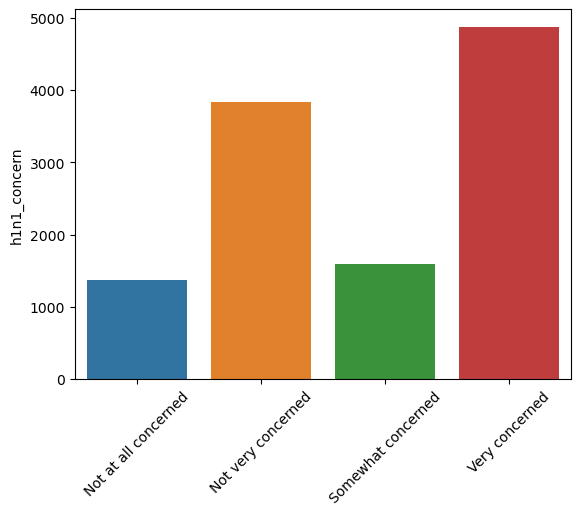

In [52]:
#merged_frames['h1n1_concern'].value_counts()
alfa = sns.barplot(x = merged_frames['h1n1_concern'].unique(),y = merged_frames['h1n1_concern'].value_counts())
alfa.set_xticks([0,1,2,3], labels= ["Not at all concerned", "Not very concerned", "Somewhat concerned", "Very concerned"],rotation = 45)


Text(0.5, 1.0, 'knowledge about h1n1')

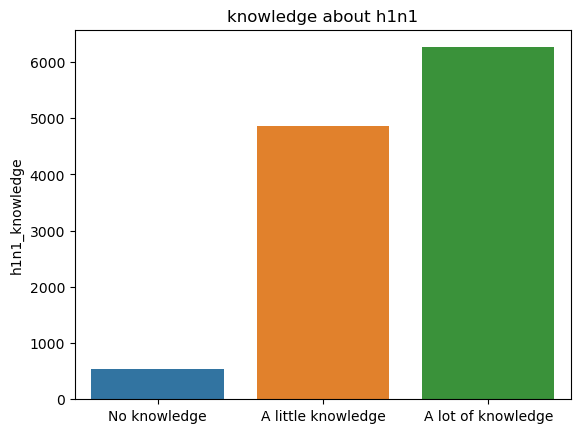

In [53]:
alfa = sns.barplot(x = merged_frames['h1n1_knowledge'].unique(),y = merged_frames['h1n1_knowledge'].value_counts())
alfa.set_xticks([0,1,2],labels=["No knowledge", "A little knowledge", "A lot of knowledge"])
alfa.set_title('knowledge about h1n1')

In [54]:
merged_frames.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'age_group', 'education',
       'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

Text(0.5, 1.0, 'taken any anti-viral')

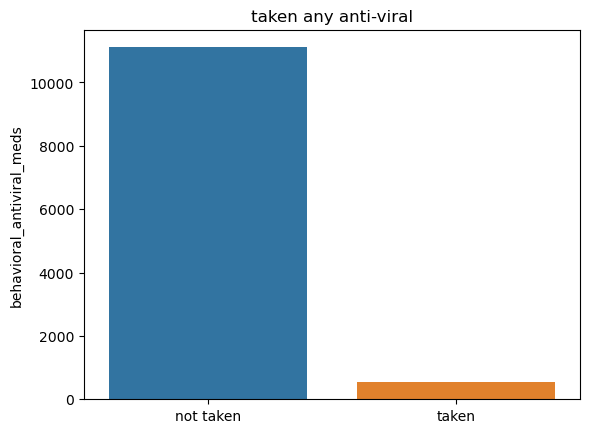

In [55]:
alfa = sns.barplot(x = merged_frames['behavioral_antiviral_meds'].unique(),y = merged_frames['behavioral_antiviral_meds'].value_counts())
alfa.set_xticks([0,1],labels=["not taken", "taken"])
alfa.set_title("taken any anti-viral")

Text(0.5, 1.0, 'avoided contact with infected person')

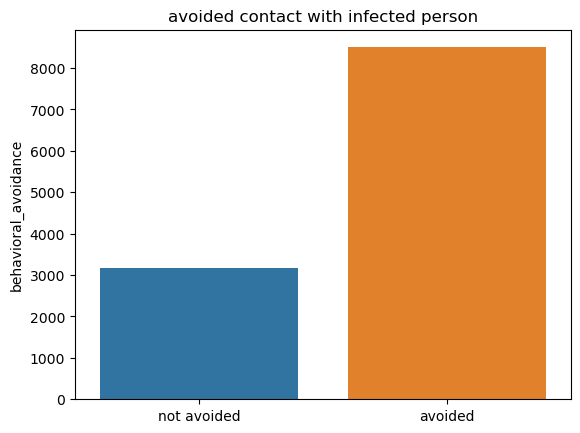

In [56]:
alfa = sns.barplot(x = merged_frames['behavioral_avoidance'].unique(), y = merged_frames['behavioral_avoidance'].value_counts())
alfa.set_xticks([0,1], labels=['not avoided','avoided'])
alfa.set_title("avoided contact with infected person")

Text(0.5, 1.0, 'Face Mask')

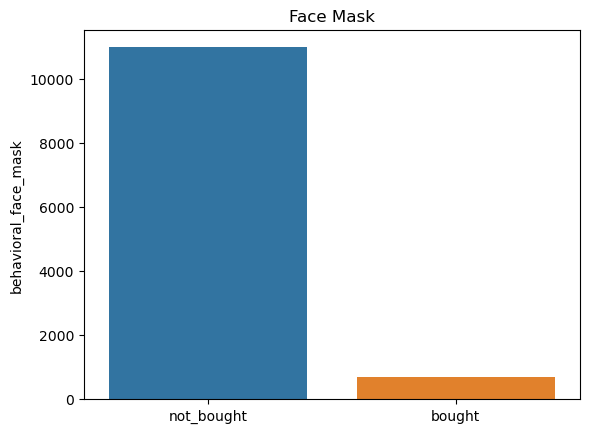

In [57]:
alfa = sns.barplot(x = merged_frames['behavioral_face_mask'].unique(),y = merged_frames['behavioral_face_mask'].value_counts())
alfa.set_xticks([0,1], labels=['not_bought', 'bought'])
alfa.set_title("Face Mask")


Text(0.5, 1.0, 'wash hands?')

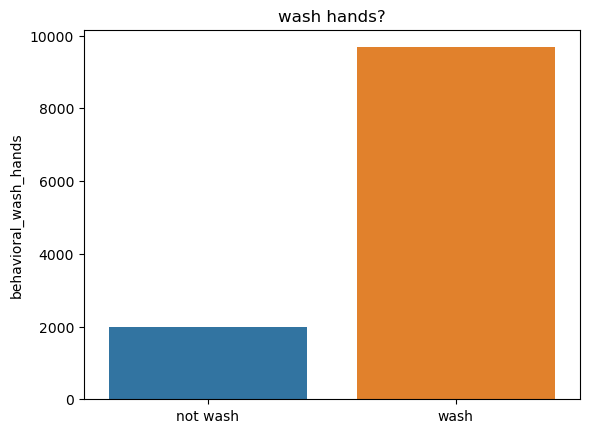

In [58]:
alfa = sns.barplot(x = merged_frames['behavioral_wash_hands'].unique(),y = merged_frames['behavioral_wash_hands'].value_counts())
alfa.set_xticks([0,1], labels=['not wash', 'wash'])
alfa.set_title("wash hands?")

Text(0.5, 1.0, 'avoided large crowd')

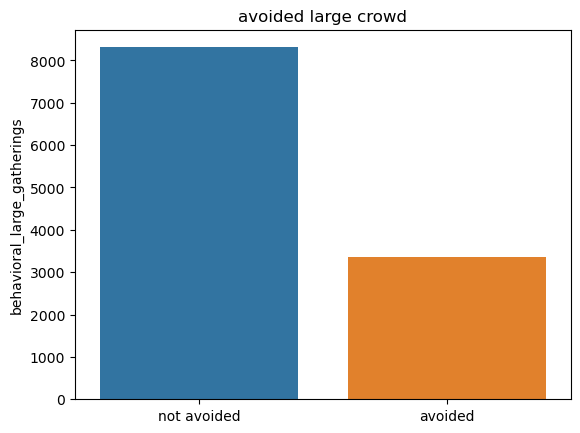

In [59]:
alfa = sns.barplot(x = merged_frames['behavioral_large_gatherings'].unique(),y = merged_frames['behavioral_large_gatherings'].value_counts())
alfa.set_xticks([0,1], labels=['not avoided', 'avoided'])
alfa.set_title("avoided large crowd")

Text(0.5, 1.0, 'reduced contact with people outside of own household ?')

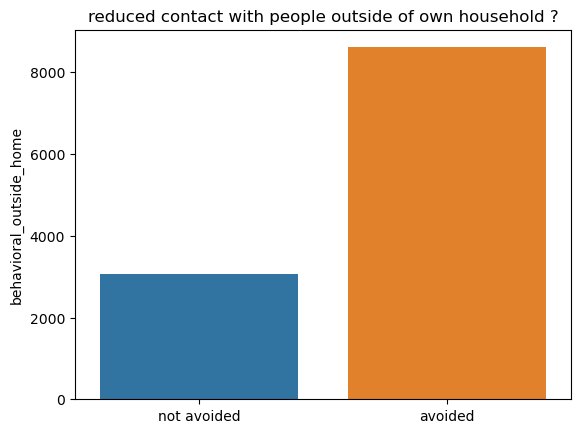

In [60]:
alfa = sns.barplot(x =merged_frames['behavioral_outside_home'].unique(), y = merged_frames['behavioral_outside_home'].value_counts())
alfa.set_xticks([0,1], labels=['not avoided', 'avoided'])
alfa.set_title("reduced contact with people outside of own household ?")


Text(0.5, 1.0, 'avoided touching face?')

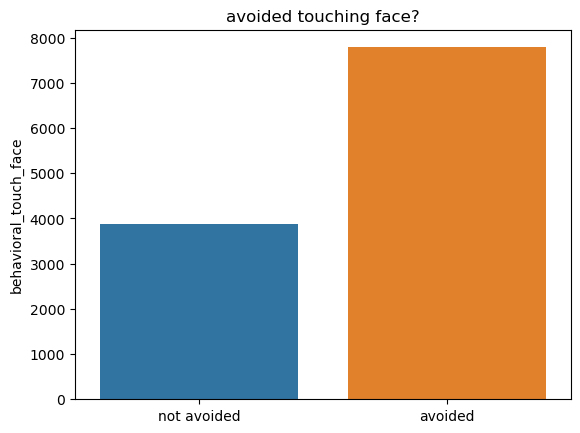

In [61]:
alfa = sns.barplot(x = merged_frames['behavioral_touch_face'].unique(), y = merged_frames['behavioral_touch_face'].value_counts())
alfa.set_xticks([0,1], labels=['not avoided', 'avoided'])
alfa.set_title("avoided touching face?")

Text(0.5, 1.0, 'Sex')

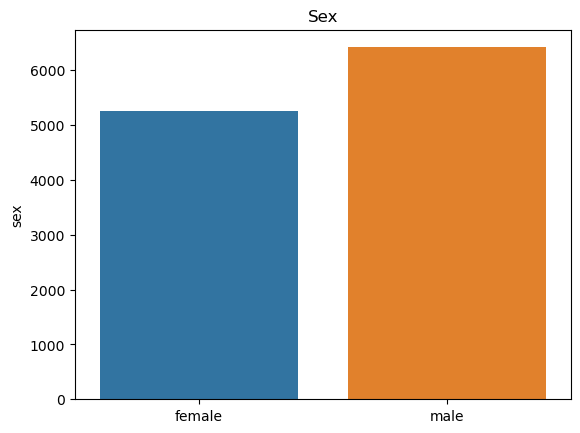

In [62]:
alfa = sns.barplot(x = merged_frames['sex'].unique(), y = merged_frames['sex'].value_counts())
alfa.set_xticks([0,1], labels=['female', 'male'])
alfa.set_title("Sex")

Text(0.5, 1.0, 'age group')

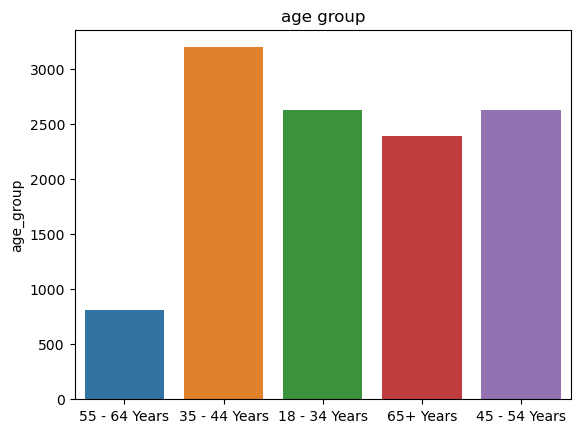

In [63]:
# age distribution
alfa = sns.barplot(x = merged_frames['age_group'].unique(), y = merged_frames['age_group'].value_counts())
alfa.set_xticks([0,1,2,3,4], labels=['55 - 64 Years',
 '35 - 44 Years',
 '18 - 34 Years',
 '65+ Years',
 '45 - 54 Years'])
alfa.set_title("age group")

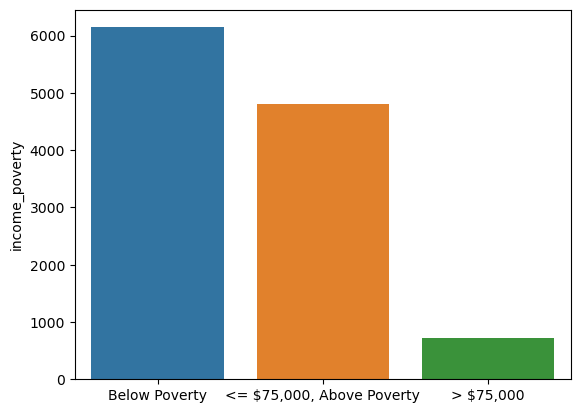

In [64]:
# employeed
alfa = sns.barplot(x = merged_frames['income_poverty'].unique(), y = merged_frames['income_poverty'].value_counts())
alfa.set_xticks([0,1,2],labels=['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'])

<AxesSubplot: >

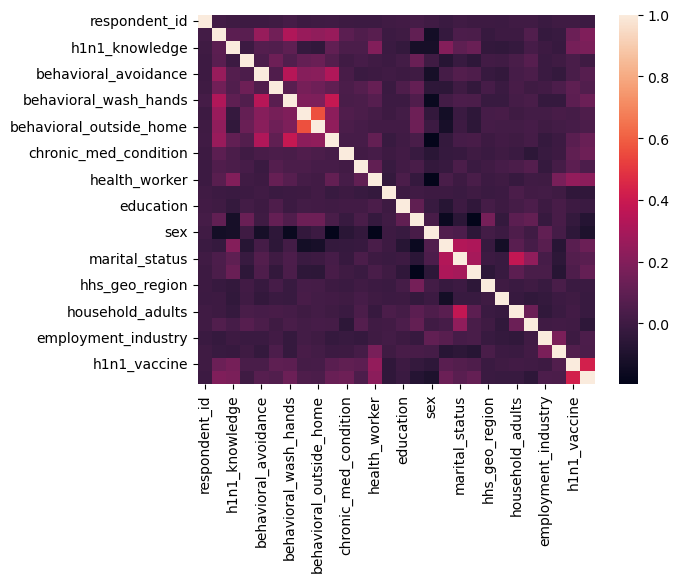

In [65]:
sns.heatmap(merged_frames.corr(method="pearson"))

In [66]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    varia

<h1> h1n1_vaccine model </h1>
<img src = "https://imgs.search.brave.com/DrrT9X670cnBUVKSd5E7_8B3BXw-mfILltCDo6Fv9Uc/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTQ0/MDk4NjIzNi9waG90/by9jbG9zZS11cC1p/bWFnZS1vZi12YWNj/aW5lLXZpYWwtYW5k/LXN5cmluZ2Utb24t/Y2RjLWNvdmlkLTE5/LXZhY2NpbmF0aW9u/LXJlY29yZC1jYXJk/LmpwZz9zPTYxMng2/MTImdz0wJms9MjAm/Yz1iblI0Nml3Q0x3/X0pxVFpPSjBnNGFR/Q3F5VkhsbVJRaU43/bUlFTGpHcGpNPQ" height = "200px" weight = "200px">

In [126]:
from sklearn.model_selection import train_test_split

X = merged_frames.drop(columns=['respondent_id','h1n1_vaccine','seasonal_vaccine'])  # Features
y = merged_frames['h1n1_vaccine']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [114]:
y.value_counts()

0    9097
1    2570
Name: h1n1_vaccine, dtype: int64

In [ ]:
merged_frames.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'age_group', 'education',
       'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [139]:
data_test = pd.read_csv("test_data.csv")
x = data_test.drop(columns=['respondent_id','Unnamed: 0'])

In [120]:
alfa_1 = []

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"SVM": SVC(probability=True),
    #"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
    #"Neural Network": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for AUC

    # predicting test variable
    test_predict = model.predict_proba(x)[:,1]
    for i in test_predict:
        alfa_1.append(i)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}
    print(f"{name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}")



Logistic Regression: Accuracy = 0.7913, ROC AUC = 0.7102


c:\Users\hp\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1 style="color: Yellow; font-size: 32px; text-align: center; font-family: Arial, sans-serif;">
    Season Vaccine Model
</h1>


In [140]:
alfa_2 = []

In [141]:
# making models for seasonal vaccine

X = merged_frames.drop(columns=['respondent_id','seasonal_vaccine','h1n1_vaccine'])  # Features
y = merged_frames['seasonal_vaccine']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(),
    #"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    #"SVM": SVC(probability=True),
    #"K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    #"Neural Network": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability for AUC

    # preddicting probability
    test_predict = model.predict_proba(x)[:,1]
    for i in test_predict:
        alfa_2.append(i)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)


    results[name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}
    print(f"{name}: Accuracy = {accuracy:.4f}, ROC AUC = {roc_auc:.4f}")


Logistic Regression: Accuracy = 0.6590, ROC AUC = 0.7098


c:\Users\hp\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:

alfa_2

[0.4677729506730072,
 0.10436904877450166,
 0.6577249493624971,
 0.6527392711828299,
 0.7104652333075666,
 0.4570721577286921,
 0.4499522959430565,
 0.6229335923965416,
 0.25598111808720364,
 0.19337188959746485,
 0.47190640535505113,
 0.39839922119748356,
 0.4986914182282775,
 0.7203263116526939,
 0.6395026893632838,
 0.6350650722654555,
 0.43111652967851644,
 0.4865433486418837,
 0.629648658783895,
 0.260195204960759,
 0.22689986654000138,
 0.33928830965231976,
 0.6356250687967975,
 0.627990150540293,
 0.326806615302509,
 0.4585042600002235,
 0.6265294935101662,
 0.7301987737517106,
 0.10891645315107155,
 0.19876903318273562,
 0.662988328671723,
 0.5803634622949039,
 0.31473235646236,
 0.3878385031134466,
 0.3365573559545949,
 0.33428969608418135,
 0.2911152543432394,
 0.3316586288871359,
 0.5658011746563395,
 0.5155447032803983,
 0.29573788644636795,
 0.45304813907134833,
 0.0687646298725159,
 0.5913062044315764,
 0.6672950472670163,
 0.4037515252451103,
 0.8751652079311946,
 0.4619

In [144]:
# final_submissio
final_prediction = pd.DataFrame()
final_prediction['respondent_id'] = data_test['respondent_id']
final_prediction['h1n1_vaccine'] = alfa_1
final_prediction['seasonal_vaccine'] = alfa_2
final_prediction.to_csv("final_prediction.csv")

In [143]:
len(alfa_2)

11738

<h1> prediction </h1>

In [70]:
data_test = pd.read_csv("test_data.csv")
data_test

,Unnamed: 0,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,sex,income_poverty,marital_status,rent_or_own,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,2,0,0,6,0,1.0,0.0,18.0,14.0
1,1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,2,3.0,0.0,18.0,4.0
2,2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,2,1,1,8,2,1.0,0.0,7.0,19.0
3,4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,1,0,1,3,2,0.0,1.0,8.0,8.0
4,5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,2,0,1,6,1,0.0,2.0,8.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11733,26698,53405,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0,2,1,1,3,0,1.0,0.0,10.0,14.0
11734,26700,53407,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,0,3.0,1.0,14.0,14.0
11735,26701,53408,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,0,1,4,2,0.0,3.0,8.0,12.0
11736,26702,53409,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,1,1,1,1,0,2.0,0.0,4.0,1.0
